In [8]:
import numpy as np
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import cv2
from skimage.filters import threshold_otsu
from scipy import ndimage

### Load the data

In [335]:
train_paths = pathlib.Path('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15').glob('*.jpeg')
train_sorted=sorted([path for path in train_paths])
im_path10=train_sorted[110:120] # get 10 images
im_path10,len(im_path10)

([PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_2.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_20.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_21.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_22.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_23.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_24.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_25.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_26.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_27.jpeg'),
  PosixPath('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15/11_28.jpeg')],
 10)

In [336]:
im_path=im_path10[2]

### Read and Preprocess the image

Text(0.5, 1.0, 'Blurred with 7x7 matrix')

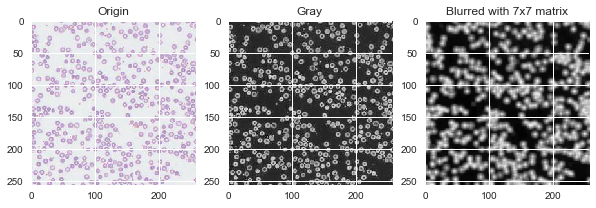

In [337]:
plt.figure(figsize=(10,6))
bgrimg = cv2.imread(str(im_path))
plt.subplot(131)
plt.imshow(bgrimg)
plt.title('Origin')
plt.subplot(132)
grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg)
plt.title('Gray')
plt.subplot(133)
img_blur=cv2.blur(grayimg,(7,7),0) #reduce the noise
plt.imshow(img_blur)
plt.title('Blurred with 7x7 matrix')

### Use the Threshold to fliter the white blood cell  (Get threshhold from multiple plots)

(-0.5, 255.5, 255.5, -0.5)

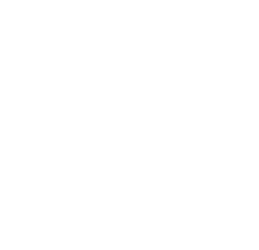

In [338]:
dist=[]
for i in range(0,len(im_path10)):
    bgrimg_thres = cv2.imread(str(im_path10[i]))
    grayimg_thres = cv2.cvtColor(bgrimg_thres,cv2.COLOR_BGR2GRAY)
    img_blur_thres=cv2.blur(grayimg_thres,(7,7),0)
    dist.extend(img_blur_thres.flatten())
    
thresh_val=np.percentile(dist,0.1)
mask=np.where(img_blur>thresh_val,0,1)
plt.imshow(mask)
plt.axis('off')


In [342]:
thresh_val

148.0

### Label the cells

In [339]:
labels,nlabels=ndimage.label(mask)
slices=ndimage.find_objects(labels)
nlabels,slices

(0, [])

### Output the Region

In [340]:
region=[]
for i in range(0,nlabels):
    sub_region={'xmin':slices[i][1].start,'xmax':slices[i][1].stop,'ymin':slices[i][0].start,'ymax':slices[i][0].stop}
    region.append(sub_region)
region

[]

### Test the Region

Text(0.5, 1.0, 'Object Detection Plot')

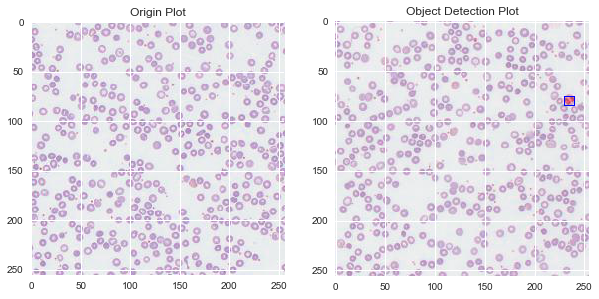

In [341]:
bgrimg = cv2.imread(str(im_path))
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(bgrimg)
plt.title('Origin Plot')
plt.subplot(122)
for i in range(0,len(region)):
    testimg=cv2.rectangle(bgrimg, (region[i]['xmin'],region[i]['ymin']), (region[i]['xmax'],region[i]['ymax']),(0,0,255),1)
plt.imshow(testimg)
plt.title('Object Detection Plot')

### Function

In [325]:
def region_detect(imgpath):
    bgrimg = cv2.imread(str(imgpath))
    grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)
    img_blur=cv2.blur(grayimg,(7,7),0)
    # Use threshold to fliter out the white blood cell 
    thresh_val=np.percentile(img_blur.flatten(),0.1)
    mask=np.where(img_blur>thresh_val,0,1)
    # Detect and label the white blood cell 
    labels,nlabels=ndimage.label(mask)
    slices=ndimage.find_objects(labels)
    # Output the region 
    region=[]
    for i in range(0,nlabels):
        sub_region={'xmin':slices[i][1].start,'xmax':slices[i][1].stop,'ymin':slices[i][0].start,'ymax':slices[i][0].stop}
        region.append(sub_region)
    return region

In [326]:
im_path=train_sorted[10]

In [327]:
region=region_detect(im_path)
region

[{'xmax': 240, 'xmin': 230, 'ymax': 84, 'ymin': 75}]

Text(0.5, 1.0, 'Object Detection Plot')

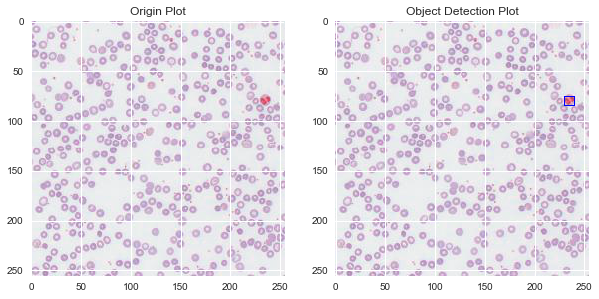

In [328]:
bgrimg = cv2.imread(str(im_path))
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(bgrimg)
plt.title('Origin Plot')
plt.subplot(122)
for i in range(0,len(region)):
    testimg=cv2.rectangle(bgrimg, (region[i]['xmin'],region[i]['ymin']), (region[i]['xmax'],region[i]['ymax']),(0,0,255),1)
plt.imshow(testimg)
plt.title('Object Detection Plot')


# Multiple Plot Testing

In [329]:
train_paths = pathlib.Path('/Users/StevenTseng/Desktop/gallenco/slide_file/a_files/15').glob('*.jpeg')
train_sorted=sorted([path for path in train_paths])

In [330]:
im_path=train_sorted[100]

In [331]:
def get_detected_img(imgpath):
    test_region=region_detect(imgpath)
    bgrimg = cv2.imread(str(imgpath))
    for i in range(0,len(test_region)):
        testimg=cv2.rectangle(bgrimg, (test_region[i]['xmin'],test_region[i]['ymin']), (test_region[i]['xmax'],test_region[i]['ymax']),(0,0,255),1)
    plt.imshow(testimg)

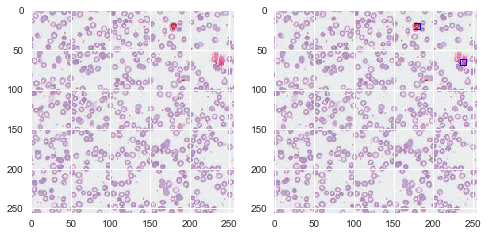

In [332]:
plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(cv2.imread(str(im_path)))
plt.subplot(122)
get_detected_img(im_path)